# Titanic  Survivel Analysis 

# Decision Tree Classifier

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Titanic Dataset

In [219]:
df=pd.read_csv("titanic.csv")
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,2.110213,2
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,4.280593,0
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,2.188856,2
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,3.990834,2
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,2.202765,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,2.202765,2
1305,1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,4.699571,0
1306,1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,2.110213,2
1307,1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,2.202765,2


In [220]:
df=df.drop(["PassengerId","Name","SibSp","Parch","Ticket","Embarked","Unnamed: 0"],axis=1)


In [221]:
df

,Survived,Pclass,Sex,Age,Fare
0,0.0,3,male,22.000000,2.110213
1,1.0,1,female,38.000000,4.280593
2,1.0,3,female,26.000000,2.188856
3,1.0,1,female,35.000000,3.990834
4,0.0,3,male,35.000000,2.202765
...,...,...,...,...,...
1304,NaN,3,male,29.881138,2.202765
1305,NaN,1,female,39.000000,4.699571
1306,NaN,3,male,38.500000,2.110213
1307,NaN,3,male,29.881138,2.202765


In [222]:
from sklearn.preprocessing import LabelEncoder

In [223]:
le=LabelEncoder()

In [224]:
df["Sex_n"]=le.fit_transform(df["Sex"])
df

,Survived,Pclass,Sex,Age,Fare,Sex_n
0,0.0,3,male,22.000000,2.110213,1
1,1.0,1,female,38.000000,4.280593,0
2,1.0,3,female,26.000000,2.188856,0
3,1.0,1,female,35.000000,3.990834,0
4,0.0,3,male,35.000000,2.202765,1
...,...,...,...,...,...,...
1304,NaN,3,male,29.881138,2.202765,1
1305,NaN,1,female,39.000000,4.699571,0
1306,NaN,3,male,38.500000,2.110213,1
1307,NaN,3,male,29.881138,2.202765,1


In [225]:
df.drop(["Sex"], axis=1)

,Survived,Pclass,Age,Fare,Sex_n
0,0.0,3,22.000000,2.110213,1
1,1.0,1,38.000000,4.280593,0
2,1.0,3,26.000000,2.188856,0
3,1.0,1,35.000000,3.990834,0
4,0.0,3,35.000000,2.202765,1
...,...,...,...,...,...
1304,NaN,3,29.881138,2.202765,1
1305,NaN,1,39.000000,4.699571,0
1306,NaN,3,38.500000,2.110213,1
1307,NaN,3,29.881138,2.202765,1


In [226]:
df=df.dropna()

In [227]:
df

,Survived,Pclass,Sex,Age,Fare,Sex_n
0,0.0,3,male,22.000000,2.110213,1
1,1.0,1,female,38.000000,4.280593,0
2,1.0,3,female,26.000000,2.188856,0
3,1.0,1,female,35.000000,3.990834,0
4,0.0,3,male,35.000000,2.202765,1
...,...,...,...,...,...,...
886,0.0,2,male,27.000000,2.639057,1
887,1.0,1,female,19.000000,3.433987,0
888,0.0,3,female,29.881138,3.196630,0
889,1.0,1,male,26.000000,3.433987,1


In [228]:
df.drop("Sex",axis=1)

,Survived,Pclass,Age,Fare,Sex_n
0,0.0,3,22.000000,2.110213,1
1,1.0,1,38.000000,4.280593,0
2,1.0,3,26.000000,2.188856,0
3,1.0,1,35.000000,3.990834,0
4,0.0,3,35.000000,2.202765,1
...,...,...,...,...,...
886,0.0,2,27.000000,2.639057,1
887,1.0,1,19.000000,3.433987,0
888,0.0,3,29.881138,3.196630,0
889,1.0,1,26.000000,3.433987,1


# Dicision Tree Fit 

In [229]:
input_n=df

In [230]:
input_n=df.drop("Sex",axis=1)

In [231]:
input_n

,Survived,Pclass,Age,Fare,Sex_n
0,0.0,3,22.000000,2.110213,1
1,1.0,1,38.000000,4.280593,0
2,1.0,3,26.000000,2.188856,0
3,1.0,1,35.000000,3.990834,0
4,0.0,3,35.000000,2.202765,1
...,...,...,...,...,...
886,0.0,2,27.000000,2.639057,1
887,1.0,1,19.000000,3.433987,0
888,0.0,3,29.881138,3.196630,0
889,1.0,1,26.000000,3.433987,1


In [232]:
input_pure=input_n.drop("Sex_n",axis=1)

# Input Features

In [233]:
input_pure

,Survived,Pclass,Age,Fare
0,0.0,3,22.000000,2.110213
1,1.0,1,38.000000,4.280593
2,1.0,3,26.000000,2.188856
3,1.0,1,35.000000,3.990834
4,0.0,3,35.000000,2.202765
...,...,...,...,...
886,0.0,2,27.000000,2.639057
887,1.0,1,19.000000,3.433987
888,0.0,3,29.881138,3.196630
889,1.0,1,26.000000,3.433987


# Target feature

In [234]:
target=input_n.Sex_n
target

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex_n, Length: 891, dtype: int32

In [235]:
input_pure=input_pure.drop("Survived",axis=1)

In [236]:
input_pure

,Pclass,Age,Fare
0,3,22.000000,2.110213
1,1,38.000000,4.280593
2,3,26.000000,2.188856
3,1,35.000000,3.990834
4,3,35.000000,2.202765
...,...,...,...
886,2,27.000000,2.639057
887,1,19.000000,3.433987
888,3,29.881138,3.196630
889,1,26.000000,3.433987


# Decision Tree Classifiers

In [237]:
from sklearn import tree

In [238]:
model=tree.DecisionTreeClassifier()

In [239]:
model.fit(input_pure,target)

DecisionTreeClassifier()

# Prediction

In [240]:
input_pure["Predicted"]=model.predict(input_pure)
input_pure

,Pclass,Age,Fare,Predicted
0,3,22.000000,2.110213,1
1,1,38.000000,4.280593,0
2,3,26.000000,2.188856,0
3,1,35.000000,3.990834,0
4,3,35.000000,2.202765,1
...,...,...,...,...
886,2,27.000000,2.639057,1
887,1,19.000000,3.433987,0
888,3,29.881138,3.196630,0
889,1,26.000000,3.433987,1


# Accuracy Measure  Cross Validation

# 94% results accuratly

# Visulize

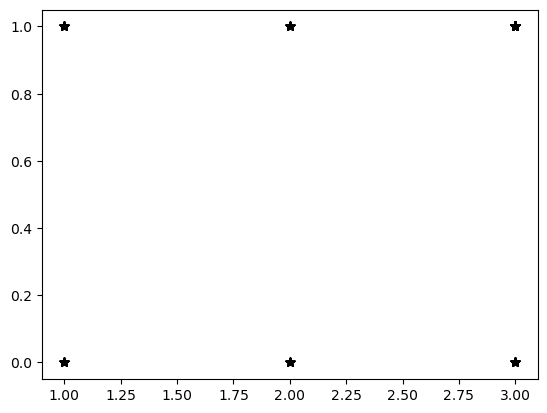

In [243]:
plt.scatter(input_pure["Pclass"],input_pure["Predicted"],marker="*",color="black")

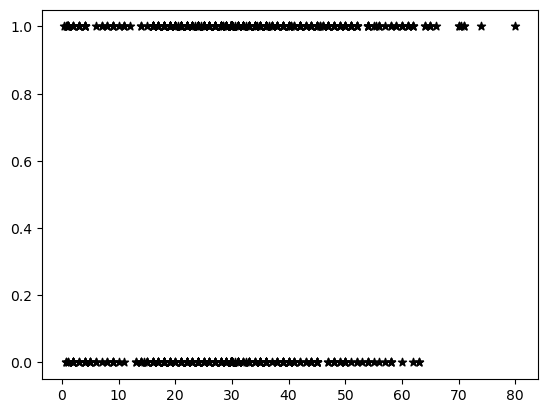

In [244]:
plt.scatter(input_pure["Age"],input_pure["Predicted"],marker="*",color="black")

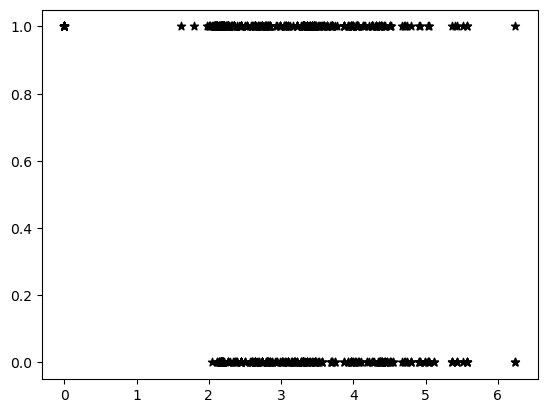

In [245]:
plt.scatter(input_pure["Fare"],input_pure["Predicted"],marker="*",color="black")

# Save Model Using Joblib method

In [202]:
import joblib

In [203]:
joblib.dump(model,"model_joblib")

['model_joblib']

In [204]:
obj=joblib.load("model_joblib")

In [206]:
obj.predict([[3,22.000000,2.110213]])

C:\Users\FAST LAPTOP\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [207]:
obj.score(input_pure,target)

0.941638608305275